Here we estimte the energy of the first atomic bomb, following Taylor (1950): https://www3.nd.edu/~powers/ame.90931/taylor.blast.wave.II.pdf

See also the first paper in this series, https://www3.nd.edu/~powers/ame.90931/taylor.blast.wave.I.pdf.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

First, we enter the bomb blast radius (r, in meters) and time (t, in seconds) from Taylor (1950, Table 1), then plot it on a log-log scale:

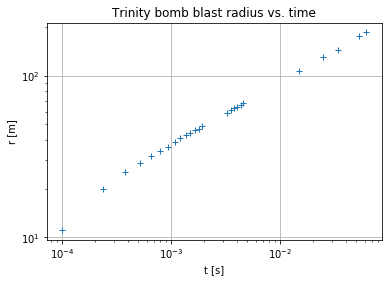

In [20]:
t = .001*np.array([.1, .24, .38, .52, .66, .8, .94, 1.08, 1.22, 1.36, 1.50, 1.65, 1.79, 1.93, 3.26, 3.53, 3.8, 4.07, 4.34, 4.61, 15, 25, 34, 53, 62]);
r = np.array([11.1, 19.9, 25.4, 28.8, 31.9, 34.2, 36.3, 38.9, 41, 42.8, 44.4, 46, 46.9, 48.7, 59, 61.1, 62.9, 64.3, 65.6, 67.3, 106.5, 130, 145, 175, 185]);  

plt.loglog(t,r,'+')
plt.xlabel('t [s]')
plt.ylabel('r [m]')
plt.title('Trinity bomb blast radius vs. time')
plt.grid()
plt.show()

Note that it nearly a straight line, so let's try to fit a line to the data of the form 
\begin{equation}
\log(r_i) = y_0 + s \log(t_i) 
\end{equation}
where the offset $y_0$ and slope $s$ are found by fitting.

Using the method of Least Squares (review your linear algebra; see, for example, Lay ch. 6), we find the optimal solution to $A\mathbf{x}=\mathbf{b}$ with $\mathbf{x}^T = [y_0,  s]$, 
\begin{equation}
 A^T = \begin{bmatrix} 1 & 1 & \cdots & 1 & 1 \\\log(t_1) & \log(t_2) & \cdots & \log(t_N) \end{bmatrix}^T
\end{equation}
and
\begin{equation}
\mathbf{b}^T = [\log(r_1), \log(r_2), \cdots , \log(r_N)]
\end{equation}
The least squares solution is
\begin{equation}
\mathbf{x} = \begin{bmatrix}y_0 \\ s\end{bmatrix} = (A^TA)^{-1}(A^T\mathbf{b})
\end{equation}

In [26]:
A = np.vstack((np.ones(len(t)),np.log10(t))).T
#A
y0,s = np.linalg.inv(A.T.dot(A)).dot(A.T.dot(np.log10(r)))
y0,s

(2.776736214021895, 0.40582262510045375)

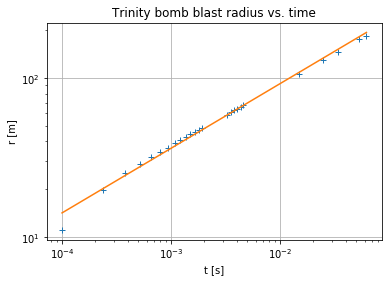

In [33]:
plt.loglog(t,r,'+')
plt.xlabel('t [s]')
plt.ylabel('r [m]')
plt.title('Trinity bomb blast radius vs. time')
plt.grid()
plt.loglog(t,10**(y0)*t**(s))
plt.show()


Notice first that $s = 0.406$ is very close to $s = 0.4 = 2/5$.  The theory proposed by Taylor is $r = C(Et^2/\rho)^{1/5}$, where $C \approx 1$ (see his eq. 8, and the values for his K in Fig. 3).  So neglecting $C$,
\begin{equation}
\log(r) = (1/5)\log(E/\rho) + (2/5)\log(t)
\end{equation}

suggesting $s=2/5$ (as found), and $y_0 = (1/5)\log(E/\rho)$, or $E = \rho e^{5 y_0}$. Using $y_0$ found numerically above, and $\rho = 1.25$ kg/m$^3$, this gives:

In [32]:
E = 1.25*10**(5*y0)
E

95629323414588.0

So the answer is $E\approx 9.56 \times 10^{13}$ J, or converting to 'tons of TNT' (dividing by $4.184\times 10^{9}$), about 23,900 tons of TNT.  This is close to the values in the bottom row of Table 3 in Taylor (1950).